This notebook is about quality of water. We have to detect either water is appropriate or not. There are some important fetures like ph,Solids and so on.
PH:PH is a measure of how acidic/basic water is. The range goes from 0 to 14, with 7 being neutral. pHs of less than 7 indicate acidity, whereas a pH of greater than 7 indicates a base. pH is really a measure of the relative amount of free hydrogen and hydroxyl ions in the water.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

In [14]:
df = pd.read_csv("C:/Users/TAK Rayaneh/jupyter files/Datasets/water/water_potability.csv")

In [15]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [16]:
df.head(-5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [17]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [19]:
#df["ph"] = df.groupby(["Potability"])['ph'].transform(lambda x: x.fillna(x.mean()))

In [21]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [22]:
df.head(-5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,332.566990,464.525552,11.083027,38.435151,4.906358,1
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


In [23]:
df.groupby(['Potability'])['Sulfate'].mean()

Potability
0    334.56429
1    332.56699
Name: Sulfate, dtype: float64

C:\Users\TAK Rayaneh\anaconda3\envs\gpu2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1998
1    1278
Name: Potability, dtype: int64

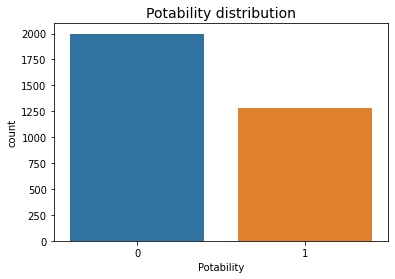

In [24]:
sns.countplot('Potability', data=df )
plt.title("Potability distribution" ,fontsize=14)
df.Potability.value_counts()

In [25]:

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
One_df = df.loc[df['Potability'] == 1]
Zero_df = df.loc[df['Potability'] == 0][:1278]

normal_distributed_df = pd.concat([One_df, Zero_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


new_df.count()

ph                 2556
Hardness           2556
Solids             2556
Chloramines        2556
Sulfate            2556
Conductivity       2556
Organic_carbon     2556
Trihalomethanes    2556
Turbidity          2556
Potability         2556
dtype: int64

C:\Users\TAK Rayaneh\anaconda3\envs\gpu2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    1278
0    1278
Name: Potability, dtype: int64

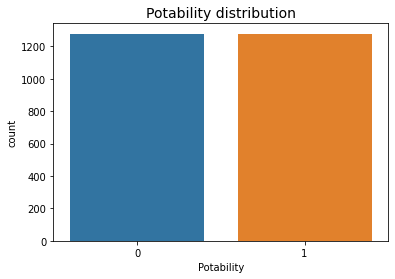

In [26]:
sns.countplot('Potability', data=new_df )
plt.title("Potability distribution" ,fontsize=14)
new_df.Potability.value_counts()

In [27]:
new_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
722,8.860451,193.743105,24085.112140,6.183110,332.566990,526.704924,9.901328,81.339340,4.677713,1
184,5.877974,141.615287,13652.293199,5.701659,279.782400,538.495404,12.034042,67.907258,4.032260,0
423,7.967345,180.531707,19384.037432,9.868238,325.496848,386.055331,11.265127,67.272207,4.069359,0
2411,7.519227,210.384790,16897.307041,6.568658,344.703673,315.520435,19.856184,66.539684,3.275725,1
211,7.085378,220.813702,21410.319624,6.324880,335.845863,382.197839,9.500296,86.990134,3.659975,0


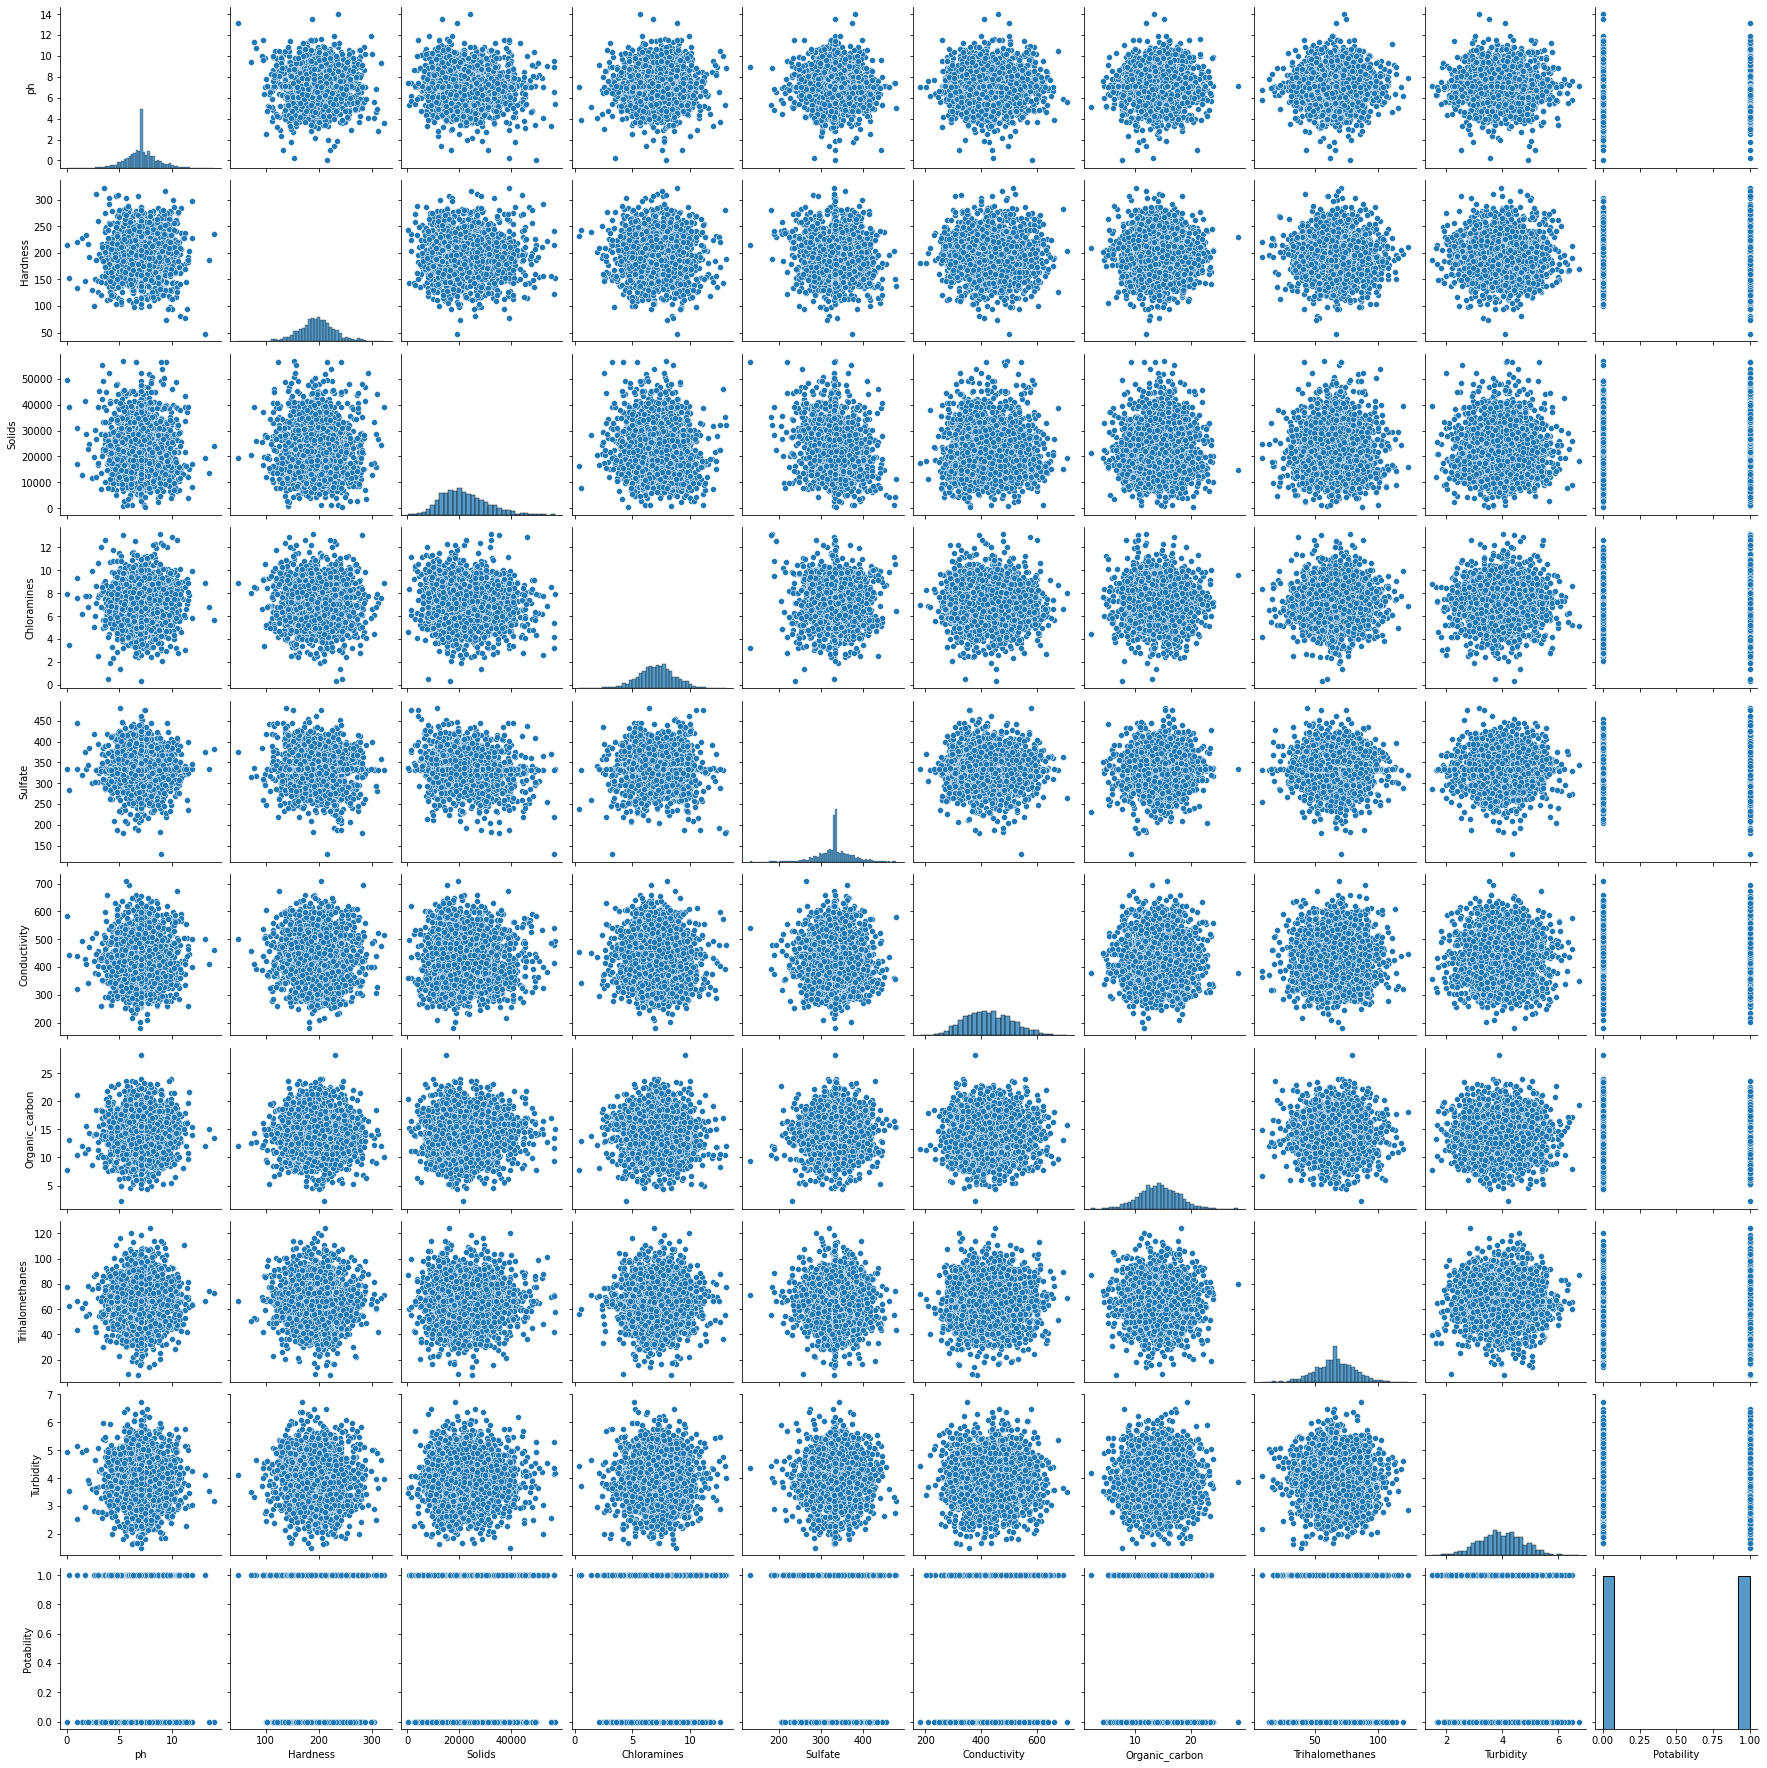

In [28]:
sns.pairplot(new_df)

In [29]:
new_df.hvplot.hist(by="ph", subplots=False , width=1000)

:NdOverlay   [Element]
   :Histogram   [Potability]   (Potability_count)

In [30]:
new_df.hvplot.hist('ph')

:Histogram   [ph]   (ph_count)

In [31]:
new_df.hvplot.scatter(x="ph" , y="Hardness")

:Scatter   [ph]   (Hardness)

In [32]:
new_df.hvplot.scatter(x="Hardness", y="Solids")

:Scatter   [Hardness]   (Solids)

<AxesSubplot:>

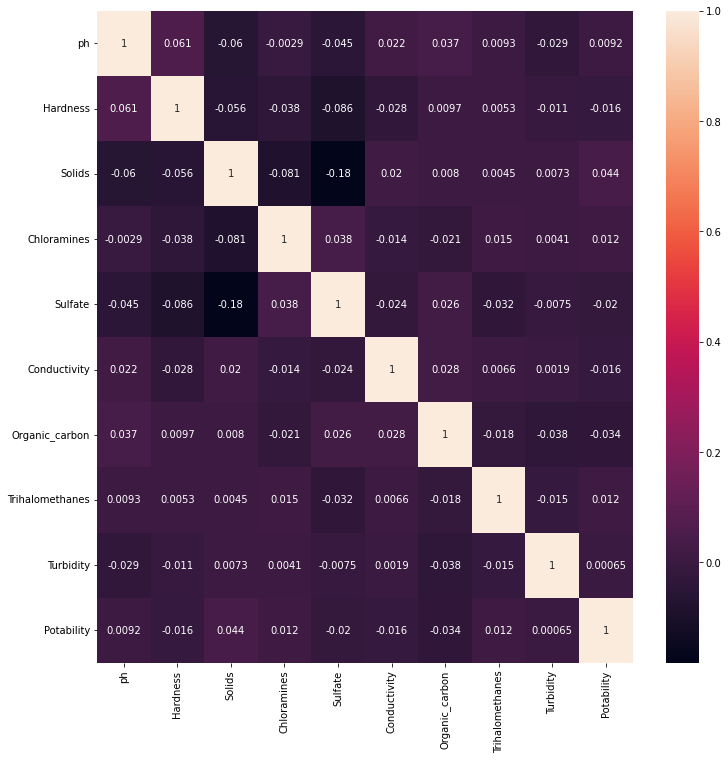

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(new_df.corr(), annot=True , ax=ax)

In [34]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
new_df.iloc[:,0:-1] = std_scaler.fit_transform(new_df.iloc[:,0:-1])


In [35]:
new_df.head(-5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
722,1.224222,-0.077049,0.236965,-0.600271,-0.020101,1.231266,-1.319996,0.959656,0.899034,1
184,-0.804006,-1.633547,-0.949265,-0.899154,-1.464678,1.376405,-0.676041,0.099350,0.081616,0
423,0.616867,-0.471532,-0.297555,1.687448,-0.213592,-0.500101,-0.908208,0.058676,0.128599,0
2411,0.312126,0.419859,-0.580301,-0.360924,0.312049,-1.368371,1.685791,0.011758,-0.876477,1
211,0.017087,0.731258,-0.067163,-0.512260,0.069634,-0.547586,-1.441085,1.321581,-0.389854,0
...,...,...,...,...,...,...,...,...,...,...
2558,-0.559135,-0.538227,-0.009258,-0.040146,0.069976,-1.712399,0.962249,-1.242724,-0.151346,0
2823,-0.101658,1.366592,-1.618724,0.556126,2.937454,0.753983,1.239104,-1.348195,0.471534,1
352,1.656057,-0.311878,-0.444877,0.234246,1.517993,-0.212105,-0.566236,-0.191951,0.254206,1
1181,1.858216,-1.053006,0.937829,-1.201696,-2.059742,-0.166504,-0.537345,0.632127,-0.302286,1


C:\Users\TAK Rayaneh\anaconda3\envs\gpu2021\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TAK Rayaneh\anaconda3\envs\gpu2021\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


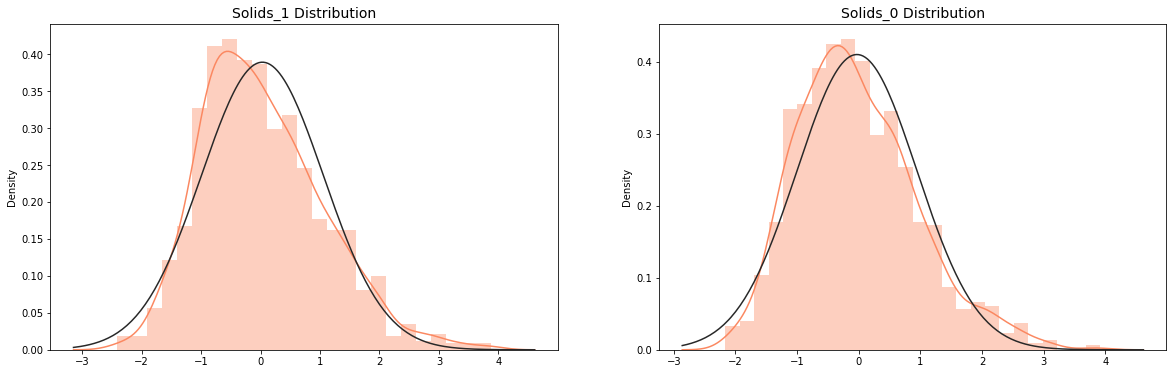

In [53]:
from scipy.stats import norm

f, (ax1,ax2) = plt.subplots(1,2, figsize=(20, 6))

Solids_dist1 = new_df['Solids'].loc[new_df['Potability']==1].values
sns.distplot(Solids_dist1,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Solids_1 Distribution', fontsize=14)

Solids_dist0 = new_df['Solids'].loc[new_df['Potability']==0].values
sns.distplot(Solids_dist0,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('Solids_0 Distribution', fontsize=14)

plt.show()

In [77]:
Solids = new_df['Solids'].loc[new_df['Potability']==1].values
q25, q75 = np.percentile(Solids, 25), np.percentile(Solids, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Solids_iqr = q75 - q25
print('iqr: {}'.format(Solids_iqr))

Solids_cut_off = Solids_iqr * 1.5
Solids_lower, Solids_upper = q25 - Solids_cut_off, q75 + Solids_cut_off
print('Cut Off: {}'.format(Solids_cut_off))
print('Solids Lower: {}'.format(Solids_lower))
print('Solids Upper: {}'.format(Solids_upper))

outliers = [x for x in Solids if x < Solids_lower or x > Solids_upper]
print('Feature Solids Outliers for Potability: {}'.format(len(outliers)))
print('Solids outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Solids'] > Solids_upper) | (new_df['Solids'] < Solids_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
Chloramines = new_df['Chloramines'].loc[new_df['Potability']==1].values
q25, q75 = np.percentile(Chloramines, 25), np.percentile(Chloramines, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Chloramines_iqr = q75 - q25
print('iqr: {}'.format(Chloramines_iqr))

Chloramines_cut_off = Chloramines_iqr * 1.5
Chloramines_lower, Chloramines_upper = q25 - Chloramines_cut_off, q75 + Chloramines_cut_off
print('Cut Off: {}'.format(Chloramines_cut_off))
print('Chloramines Lower: {}'.format(Chloramines_lower))
print('Chloramines Upper: {}'.format(Chloramines_upper))

outliers = [x for x in Chloramines if x < Chloramines_lower or x > Chloramines_upper]
print('Feature Solids Outliers for Potability: {}'.format(len(outliers)))
print('Solids outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Chloramines'] > Chloramines_upper) | (new_df['Chloramines'] < Chloramines_lower)].index)
print('----' * 44)




Quartile 25: -0.7291036866647013 | Quartile 75: 0.6590397752018013
iqr: 1.3881434618665027
Cut Off: 2.082215192799754
Solids Lower: -2.8113188794644555
Solids Upper: 2.7412549680015554
Feature Solids Outliers for Potability: 19
Solids outliers:[3.16284751819583, 3.876099852650709, 3.3394404016222135, 3.5655369408593405, 2.872312440199432, 3.3764906023534484, 2.9647317344165205, 3.2336257735136105, 2.797920246152201, 2.808171082678967, 2.871151362702117, 2.9193108033454642, 3.8571367570623565, 2.901826322263503, 2.7738529288428584, 3.8606126095161915, 2.988546859058764, 3.405675597888334, 3.0323610135939556]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.6384566634599033 | Quartile 75: 0.6701202065761465
iqr: 1.3085768700360498
Cut Off: 1.9628653050540747
Chloramines Lower: -2.601321968513978
Chloramines Upper: 2.6329855116302214
Feature Solid

In [78]:
Solids = new_df['Solids'].loc[new_df['Potability']==0].values
q25, q75 = np.percentile(Solids, 25), np.percentile(Solids, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Solids_iqr = q75 - q25
print('iqr: {}'.format(Solids_iqr))

Solids_cut_off = Solids_iqr * 1.5
Solids_lower, Solids_upper = q25 - Solids_cut_off, q75 + Solids_cut_off
print('Cut Off: {}'.format(Solids_cut_off))
print('Solids Lower: {}'.format(Solids_lower))
print('Solids Upper: {}'.format(Solids_upper))

outliers = [x for x in Solids if x < Solids_lower or x > Solids_upper]
print('Feature Solids Outliers for Potability: {}'.format(len(outliers)))
print('Solids outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Solids'] > Solids_upper) | (new_df['Solids'] < Solids_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
Chloramines = new_df['Chloramines'].loc[new_df['Potability']==0].values
q25, q75 = np.percentile(Chloramines, 25), np.percentile(Chloramines, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
Chloramines_iqr = q75 - q25
print('iqr: {}'.format(Chloramines_iqr))

Chloramines_cut_off = Chloramines_iqr * 1.5
Chloramines_lower, Chloramines_upper = q25 - Chloramines_cut_off, q75 + Chloramines_cut_off
print('Cut Off: {}'.format(Chloramines_cut_off))
print('Chloramines Lower: {}'.format(Chloramines_lower))
print('Chloramines Upper: {}'.format(Chloramines_upper))

outliers = [x for x in Chloramines if x < Chloramines_lower or x > Chloramines_upper]
print('Feature Solids Outliers for Potability: {}'.format(len(outliers)))
print('Solids outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['Chloramines'] > Chloramines_upper) | (new_df['Chloramines'] < Chloramines_lower)].index)
print('----' * 44)


Quartile 25: -0.7167225257333665 | Quartile 75: 0.5615652145299612
iqr: 1.2782877402633277
Cut Off: 1.9174316103949915
Solids Lower: -2.634154136128358
Solids Upper: 2.4789968249249528
Feature Solids Outliers for Potability: 14
Solids outliers:[2.4965046456883973, 2.7015141851048887, 2.58461091473563, 2.5780206415485956, 2.5235288380147978, 2.5967568066436266, 2.6859825797946897, 2.5987684985718067, 2.5683464763632657, 2.6050713439436017, 2.5095911281741383, 2.536279849469051, 2.565128253310533, 2.7085955987982286]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -0.6040610123881067 | Quartile 75: 0.5828191787895178
iqr: 1.1868801911776246
Cut Off: 1.780320286766437
Chloramines Lower: -2.3843812991545437
Chloramines Upper: 2.363139465555955
Feature Solids Outliers for Potability: 10
Solids outliers:[-2.4802177333826663, 2.555917830727916, 2.453492

In [79]:
new_df.count()

ph                 2455
Hardness           2455
Solids             2455
Chloramines        2455
Sulfate            2455
Conductivity       2455
Organic_carbon     2455
Trihalomethanes    2455
Turbidity          2455
Potability         2455
dtype: int64

In [36]:
X = new_df.drop('Potability', axis=1)
y = new_df['Potability']

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [39]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    
    grid = GridSearchCV(
         estimator = algorithm,
         param_grid = gridSearchParams,
         cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
        
    grid_result = grid.fit(X_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test,pred)
    
    
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score :'+ str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n',cm)

In [59]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[3,4,5,6,7],
           'learning_rate':np.arange(0.01,0.1,0.01).tolist()
         }
FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[09:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params : {'learning_rate': 0.060000000000000005, 'max_depth': 4, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.78      0.77       239
           1       0.80      0.79      0.80       273

    accuracy                           0.79       512
   macro avg       0.78      0.78      0.78       512
weighted avg       0.79      0.79      0.79       512

Accuracy Score :0.78515625
Confusion Matrix : 
 [[186  53]
 [ 57 216]]


C:\Users\TAK Rayaneh\anaconda3\envs\gpu2021\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [72]:
param = {
                'n_estimators':[100,500,1000,1500,2000],
               'max_depth':[2,3,4,5,6,7],
        
                 }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Params : {'max_depth': 7, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.80      0.78       239
           1       0.82      0.78      0.80       273

    accuracy                           0.79       512
   macro avg       0.79      0.79      0.79       512
weighted avg       0.79      0.79      0.79       512

Accuracy Score :0.7890625
Confusion Matrix : 
 [[191  48]
 [ 60 213]]


In [61]:
param = {
           'C':[0.1,1,100,1000],
           'gamma':[0.0001,0.001,0.005,0.1,1,3,5],
           
         }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Params : {'C': 1, 'gamma': 0.1}
Classification Report :               precision    recall  f1-score   support

           0       0.60      0.75      0.67       239
           1       0.72      0.55      0.63       273

    accuracy                           0.65       512
   macro avg       0.66      0.65      0.65       512
weighted avg       0.66      0.65      0.64       512

Accuracy Score :0.646484375
Confusion Matrix : 
 [[180  59]
 [122 151]]


In [62]:
param = {
           'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree','brute'],
              'n_jobs':[-1]
         }
FitModel(X_train,y_train,X_test,y_test,'Knn',KNeighborsClassifier(),param,cv=5)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params : {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6}
Classification Report :               precision    recall  f1-score   support

           0       0.53      0.79      0.63       239
           1       0.68      0.39      0.50       273

    accuracy                           0.58       512
   macro avg       0.60      0.59      0.57       512
weighted avg       0.61      0.58      0.56       512

Accuracy Score :0.576171875
Confusion Matrix : 
 [[188  51]
 [166 107]]


In [63]:
param = {
           'n_estimators':[500,1000,2000],
           'learning_rate':[.001,0.01,.1]
           
         }
FitModel(X_train,y_train,X_test,y_test,'AdaBoost',AdaBoostClassifier(),param,cv=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Params : {'learning_rate': 0.1, 'n_estimators': 2000}
Classification Report :               precision    recall  f1-score   support

           0       0.69      0.72      0.71       239
           1       0.75      0.72      0.74       273

    accuracy                           0.72       512
   macro avg       0.72      0.72      0.72       512
weighted avg       0.72      0.72      0.72       512

Accuracy Score :0.72265625
Confusion Matrix : 
 [[173  66]
 [ 76 197]]


In [45]:
param = {
           'n_estimators':[200,1000,2000],
           'max_depth':[2,3,4,5,6,7],
           'learning_rate':[.001,0.01,.1]
           
         } 
FitModel(X_train,y_train,X_test,y_test,'GradientBoostingClassifier',GradientBoostingClassifier(),param,cv=5)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Params : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Classification Report :               precision    recall  f1-score   support

           0       0.77      0.72      0.74       239
           1       0.77      0.81      0.79       273

    accuracy                           0.77       512
   macro avg       0.77      0.76      0.77       512
weighted avg       0.77      0.77      0.77       512

Accuracy Score :0.767578125
Confusion Matrix : 
 [[171  68]
 [ 51 222]]


In [64]:

param = {
           'bootstrap': [True, False],
           'bootstrap_features': [True, False],    
           'n_estimators': [5, 10, 15,90],
           'max_samples' : [0.6, 0.8, 1.0]
           
         } 
FitModel(X_train,y_train,X_test,y_test,'BaggingClassifier',BaggingClassifier(),param,cv=5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Params : {'bootstrap': True, 'bootstrap_features': True, 'max_samples': 0.6, 'n_estimators': 90}
Classification Report :               precision    recall  f1-score   support

           0       0.73      0.76      0.75       239
           1       0.78      0.75      0.77       273

    accuracy                           0.76       512
   macro avg       0.76      0.76      0.76       512
weighted avg       0.76      0.76      0.76       512

Accuracy Score :0.7578125
Confusion Matrix : 
 [[182  57]
 [ 67 206]]
